**How Should Companies Adjust their Advertisement Budget to Increase Product Sales?**

In this project, I will demonstrate how *could a company adjust their advertisement budget* to increase or maximize their sales of a particular product using an example dataset (see the source below). This data consists of the sales of that product in 200 different markets, along with advertising budgets for TV, radio, and newspaper for the product for each of the markets. **Note that here we assume the company doesn't know how to increase sales of the product.** Our task is to potentially find association between ads budget and sales. In order to accomplish this, we could develop a model that can be used to predict sales using the three different media budget.

We first download Numpy and Pandas packages to Python. Then, we the import the data.

In [71]:
import numpy as np
import pandas as pd

# We import the data from a csv file
data = pd.read_csv("/Users/100355063/Desktop/Python_data/adsdata.csv")

# We drop the empthy column that comes with the data using the argument. You can manipulate the following to exlude any columns you don't need.
df = pd.DataFrame(data.drop(['Unnamed: 0'], axis = 1))

# We then print our data
print(df)

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


--> You notice that in our data, sales is in thousands of units while TV, radio, and newspaper are in thousands of dollars.

---
Next, we plot each of the predictor variables (ads budgets) vs sales to get a little bit of insights into the data:

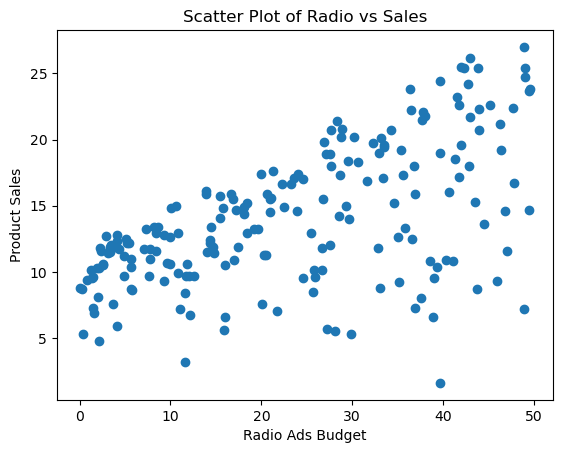

In [72]:
import matplotlib.pyplot as plt

# data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/adsdata.csv")
df = pd.DataFrame(data.drop(['Unnamed: 0'], axis = 1))

# Plot scatter plot
plt.scatter(df['radio'], df['sales'])

# Add axis labels and title
plt.xlabel('Radio Ads Budget')
plt.ylabel('Product Sales')
plt.title('Scatter Plot of Radio vs Sales')

# Show plot
plt.show()

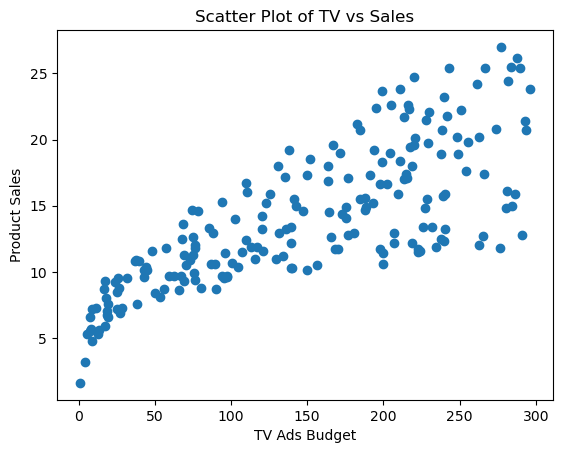

In [73]:
import matplotlib.pyplot as plt

# data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/adsdata.csv")
df = pd.DataFrame(data.drop(['Unnamed: 0'], axis = 1))

# Plot scatter plot
plt.scatter(df['TV'], df['sales'])

# Add axis labels and title
plt.xlabel('TV Ads Budget')
plt.ylabel('Product Sales')
plt.title('Scatter Plot of TV vs Sales')

# Show plot
plt.show()

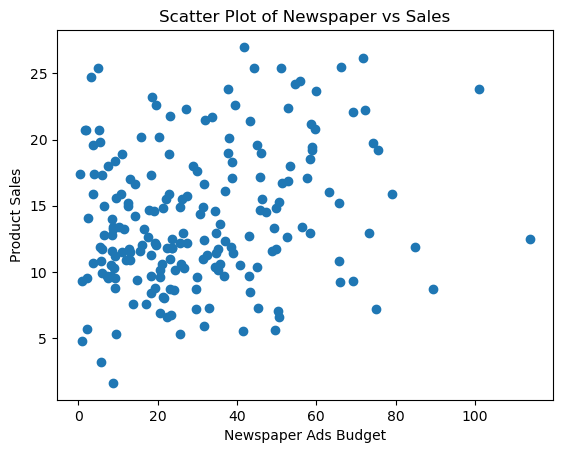

In [74]:
import matplotlib.pyplot as plt

# data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/adsdata.csv")
df = pd.DataFrame(data.drop(['Unnamed: 0'], axis = 1))

# Plot scatter plot
plt.scatter(df['newspaper'], df['sales'])

# Add axis labels and title
plt.xlabel('Newspaper Ads Budget')
plt.ylabel('Product Sales')
plt.title('Scatter Plot of Newspaper vs Sales')

# Show plot
plt.show()

Based on the plots, it is somewhat clear to see a linear (or straight-ish) trend with TV and Radio vs sales but hard to observe that with newspaper vs sales (last plot). We definitely need to run some in-depth statistical anaylses to be able to analyze the data better and make confident conclusions.

Next, we list the following questions to guide this project to complete our task.

---
**Question #1: Is there a relationship between product sales and advertising budget?** 

We could answer this question by fitting a multiple linear regression model using our advertising data. We regress sales (our response variable) onto TV, radio, and newspaper budgets (predictor variables). We install the following tools onto Python to be able to create a model:

In [75]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

model = smf.ols('sales ~ TV + radio + newspaper', data=df)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        14:04:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

--> According to our table, F-statistic is around **570** which is pretty high, so this suggests that at least one of our variables is associated with sales. In addition, R-squared of this model ended up being approximately **0.90** and so we suspect that variability in sales **could be explained by this multiple linear model.**

Next, we must define our variables using letters for simplicity of the future analysis. We convert our data frame columns into Numphy arrays:

In [76]:
y = np.array(df['sales'])
x1 = np.array(df['TV'])
x2 = np.array(df['radio'])
x3 = np.array(df['newspaper'])

--> Then we compute mean values for our response value (y), sales. The average value is 14.022 which is 14,022 units for the 200 markets provided in the data.

In [77]:
from numpy import mean

mean(y)

14.0225

---
**Question #2: How strong is the relationship between sales and ads budget?**

In order to answer this question, we could look at two simple statistical indicators- RSE (residual standard error) estimates and R^2 statistic. 

We first compute RSE using the following commands on Python:

In [78]:
model.resid.std()

1.6727572743844112

--> We can say that on average, actual sales in each market deviate from the true regression line by approximately 1,680 units. Considering the average is 14,022 our percentage error is approximately %12 which is not too bad (note that this was computed by 1,680/14,022).

Next we consider R-squared of this model, which ended up being approximately 0.90 (this is drawn from the uupper right portion of the regression model summary from above). Since this value is close to 1, we can confidently say that **90% of the variability in sales** could be explained by this linear regression model. This is a strong association!

---
**Question #3: Which media adverting budget are associated with sales of the product?**

In order to answer this question, we need to take a look at the regression table (provided above) and examine p-values and coefficient values attached to each of the predictor variables. Since the p-values for TV and Radio are very small, and for newspaper is high, we can say that **only TV and radio** budgets are associated with the sales for the product. 

We now take a look at the regression table again or just use Python's "model.params" function to pull coefficients for each of the predictors. The coefficient value for radio budget is 0.19 (rounded) meaning that every 1000 dollars increase in radio budget leads to an increase in sales by approximately **190 units** when TV and newspaper budget is fixed. Same thing could be said for TV budget- every 1000 dollars increase in that budget leads to an increase in sales by approximately **46 units** adjusted for the other two ads budgets.

In [79]:
print(model.params)

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64


---
**Question #4: How large is the association between each media budget and sales?**

In order to answer this question, we can take a look at confidence intervals (CI) of each of the predictor variables. Below we compute 95% CI for the coefficients in the model using Python:

In [80]:
model = smf.ols('y ~ TV + radio + newspaper', data=df)
model = model.fit()

print(model.conf_int(0.05))

                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
radio      0.171547  0.205513
newspaper -0.012616  0.010541


According to the print, we have CIs of (0.043, 0.049) for TV, (0.172, 0.206) for radio, and (−0.013, 0.011) for newspaper. This suggests that, 
- Using CI for radio, for each 1000 dollars increase in radio ads budget, the sales will see an average increase between 172 and 206 units. 
- Using CI for TV spending, for each 1000 dollars increase in TV spending, the sales will see an average increase between 43 and 48 units.
- Since the interval for newspaper has a negative value, this variable is not statistically significant in the presence of the other two variables. 
- We could also interpret the CI for intercept as follows- sales will fall somewhere between 2,324 and 3,554 units in the absence of all the three media advertising.

--> Another consideration when it comes to the association between the predictors (ads buudget) and response variable (sales) is the idea of correlation between predictors. Since we do not want predictors to be correlated with each other, we simply create a correlation matrix using the following function:

In [81]:
corr_matrix = df.corr()
print(corr_matrix)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


According to the table, newspaper and radio are positively correlated though it's a mild correlation. This indicates that **markets with high newspaper advertising tend to also have high radio advertising.**

--> Now we are suspicious about potential **collinearity** between predictors which is situation in which two or more predictor variables are related to one another. To examine for this, we compute **variance inflation factor (VIF)**. The following is used to define and compute VIF:

In [82]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
        
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [83]:
calculate_vif(df=df, features=['TV','radio','newspaper'])

,VIF,Tolerance
TV,1.004611,0.995410
radio,1.144952,0.873399
newspaper,1.145187,0.873220


Looking at the table above, we **do not** see anything problematic since all the VIF values are lower than 5. The mild correlation between radio and newspaper doesn't pose collinearity issue in the model.

--> Next we can assess the association of each media budget individually on sales and so we would need to perform three separate simple linear regressions (instead of one big multiple linear regression including all our predictor variables). Here are the Python codes for that:

In [84]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

model1 = smf.ols('sales ~ TV', data=df)
model1 = model1.fit()
model2 = smf.ols('sales ~ radio', data=df)
model2 = model2.fit()
model3 = smf.ols('sales ~ newspaper', data=df)
model3 = model3.fit()

print("Model 1:")
print(model1.summary())
print("\nModel 2:")
print(model2.summary())
print("\nModel 3:")
print(model3.summary())

Model 1:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        14:04:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360

In Model 1, the association between TV and sales is strong, as indicated by the high coefficient estimate (0.0475) and the low p-value (0.000) for TV. The R-squared value (0.612) also suggests that the predictor TV explains a large portion of the variation in the response sales.

In Model 2, the association between radio and sales is also strong, as indicated by the coefficient estimate (0.2025) and the low p-value (0.000) for radio. However, the R-squared value (0.332) suggests that the predictor radio explains a smaller portion of the variation in the response sales compared to TV in Model 1.

In Model 3, the association between newspaper and sales is weaker, as indicated by the coefficient estimate (0.0547) and the higher p-value (0.001) for newspaper. The low R-squared value (0.052) suggests that the predictor newspaper explains a very small portion of the variation in the response sales, even when the values of TV and radio are ignored.

---
**Question #5 - How accurately could we predict future sales using model?**

We can compute response variable using our multiple linear regression. 
- If we want to compute individual response, we need to use a prediction intervals.
- If we want to compute average response, we need to use confidence intervals.

We are removing the predictor variable newspaper for predictions here since it has a very little impact. Let's assume 100,000 dollars is spent on TV advertising and 20,000 dollars is spent on radio advertising in each country. We need to calculate the **predicted sales** at these advertising levels (dollar inputs) and compute the confidence interval for the predicted sales. We can use the following steps:

Identify the coefficients and intercept from the regression table: Intercept: 2.9211, TV: 0.0458, radio: 0.1880. Then we plug in the advertising levels into the regression equation to calculate the predicted sales:
- predicted sales = intercept + TV * 100,000 + radio * 20,000
- predicted sales = 2.9211 + 0.0458 * 100,000 + 0.1880 * 20,000
- predicted sales = **11,786**

Then we calculate the standard error of the predicted sales (s.e. = sqrt(MSE * (1/n + (TV - mean(TV))^2 / SS(TV) + (radio - mean(radio))^2 / SS(radio)))). We can use the mean and SS values from the regression table to compute the s.e.
- mean(TV) = 147.0425 & SS(TV) = 1.6856e+07
- mean(radio) = 23.264 & SS(radio) = 1846.92
s.e. = sqrt(2.784 / 197 + (100,000 - 147.0425)^2 / 1.6856e+07 + (20,000 - 23.264)^2 / 1846.92)
**Thus, s.e. = 897.079**

Now we calculate the confidence interval using the t-distribution with 197 degrees of freedom and a 95% confidence level:

CI = predicted sales +/- t(0.025, 197) * s.e.
t(0.025, 197) = 1.972, CI = 11,786 +/- 1.972 * 897.079, **CI = (10,985, 11,587).**

Therefore, the 95% confidence interval for the predicted sales at 100,000 dollars spent on TV advertising and 20,000 dollars spent on radio advertising is (10,985, 11,587). **This means that we can be 95% confident that the true value of the average sales in a large number of countries will fall within this interval.**

In [85]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/adsdata.csv")

# Fit the OLS model
X = data[['TV', 'radio']]
X = sm.add_constant(X)
y = data['sales']
model = sm.OLS(y, X).fit()

# Compute confidence intervals for the coefficients
conf_int = model.conf_int(alpha=0.05)
conf_int.columns = ['Lower CI', 'Upper CI']
print(conf_int)

       Lower CI  Upper CI
const  2.340343  3.501857
TV     0.043013  0.048497
radio  0.172139  0.203850


In [86]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

model = smf.ols('sales ~ TV + radio', data=df)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           4.83e-98
Time:                        14:04:43   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

--- 
**Question #6 - Is there an interaction effect?**

It is always helpful to look at interaction effects of the predictor variables in addition to main effects. Previously, we regressed TV, Radio and Newspaper ads budgets onto sales. We noticed that newspaper didn't have a big impact so we removed that. But then we noticed that Radio and TV budgets were positively correlated so we suspect that those two variables might have some form on interaction (or synergy) effects. Here we create a new regression model:

In [87]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

model = smf.ols('sales ~ TV + radio + TV*radio', data=df)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          6.68e-146
Time:                        14:04:43   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

--> Now we have the model with including the interaction effect of radio and TV advertising. The p-value for the interaction term is low so that effect is significant. The overall R squared for this model is 0.96 vs 0.89 on the previous model (with all the predictor variables)) which means that the variation in sales is **explained better with the later model.**

The interpretion of this is that every $1000 increase in TV adversiting is associated with an increase of 19 + 1.1 * radio advertising many units. Similar interpretation could be made for radio advertising. 

Overall, we can learn a lot about this data through applying various statistical concepts and using regression models. It is clear that this sort of analysis couuld be helpful foor a company to make adjustment to help increase their product sales and increase profits. 

Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani's 2021 book titled "An Introduction to Statistical Learning" was mainly used for this project. This book is free and accessable through: https://www.statlearning.com/. The data for this project comes from: https://www.statlearning.com/resources-second-edition under Data Sets and Advertising.csv